<h1 style="color:red;text-align:center;font-size:50px">Ejemplo de VaR paramétrico</h1>

# 📖 **Introducción** 
<p>El Valor en Riesgo (VaR) es una métrica financiera utilizada para estimar la posible pérdida en el valor de una inversión o cartera durante un período de tiempo determinado, con un nivel de confianza específico. Proporciona una medida probabilística de la peor pérdida esperada bajo condiciones normales de mercado.</p>

# 🎯 **Objetivo**  

El propósito de este análisis es calcular el **Valor en Riesgo (VaR) al 95% de confianza** para un portafolio de inversión de **$300,000,000 COP**, distribuido de la siguiente manera:  

📌 **55% en acciones de Ecopetrol**  
📌 **45% en acciones de Celsia**  

Para ello, aplicaremos el **método paramétrico**, el cual se basa en la estimación de los retornos esperados, la varianza de cada activo y la covarianza entre ellos. Estos parámetros nos permitirán modelar la distribución normal de los retornos del portafolio, asumiendo que dichos retornos siguen una distribución normal.  

✅ Con este enfoque, determinaremos la **máxima pérdida esperada bajo condiciones normales de mercado**.  


# 📊 **Metodología**  

Para calcular el **Valor en Riesgo (VaR) histórico** del portafolio, seguimos estos pasos:  

### 1️⃣ **Obtención de datos**  
📥 Descargamos los precios de cierre históricos de las acciones de **Ecopetrol** y **Celsia** desde *Yahoo Finance*.  

### 2️⃣ **Cálculo de retornos diarios**  
📈 Calculamos los rendimientos diarios de cada acción a partir de la variación porcentual entre precios consecutivos.  

### 3️⃣ **Cálculo de los parámetros de cada acción**  
🔢 Determinamos la **varianza** y el **promedio (retorno esperado)** de las acciones de **Ecopetrol** y **Celsia**.  

### 4️⃣ **Cálculo de la covarianza**  
📊 Calculamos la **covarianza** entre los retornos diarios de **Ecopetrol** y **Celsia**, lo que nos permite medir la relación y dependencia entre ambos activos.  

### 5️⃣ **Cálculo de la desviación estándar y retorno del portafolio**  
📉 Calculamos la **desviación estándar** del portafolio conformado por **Ecopetrol** y **Celsia**, así como su **retorno esperado**.  

### 6️⃣ **Cálculo del VaR paramétrico**  
📌 Aplicamos la fórmula del **VaR paramétrico**, asumiendo que los retornos siguen una distribución normal, para estimar la pérdida potencial del portafolio con un **95% de confianza**.  

### 7️⃣ **Visualización de la distribución normal del portafolio**  
📊 Graficamos un **histograma de ganancias y pérdidas**, superponiendo la **distribución normal estimada** y resaltando la zona donde el **VaR es superado**, para facilitar la interpretación del riesgo.  


---

# 🚀 Ejecución

In [1]:
import yfinance as yf 
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

**yfinance**: Es una API que permite obtener datos financieros reales desde *Yahoo Finance*, incluyendo precios de acciones, volúmenes y otros indicadores.  

**numpy**: Es una biblioteca de Python que facilita la manipulación y el cálculo eficiente de arreglos numéricos, siendo ampliamente utilizada en operaciones matemáticas y científicas.  


In [2]:
"""
* Se crean objetos Ticker para las acciones de Ecopetrol y Celsia en la Bolsa de Valores de Colombia.
* Se descargan los datos históricos de precios para un año, concretamente entre el 11 de marzo de 2024 y el 11 de marzo de 2025.
"""
dat_ec = yf.Ticker("ECOPETROL.CL") 
dat_cl = yf.Ticker("CELSIA.CL") 

datos_ecopetrol = dat_ec.history(start="2024-03-11",end="2025-03-12")
datos_celsia = dat_cl.history(start="2024-03-11",end="2025-03-12")

In [3]:
datos_ecopetrol

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,1917.201751,1940.582261,1889.145140,1926.553955,7513846,0.0,0.0
2024-03-12 00:00:00-04:00,1926.553970,1954.610581,1917.201766,1940.582275,4786471,0.0,0.0
2024-03-13 00:00:00-04:00,1963.962708,1977.991013,1945.258301,1945.258301,3251229,0.0,0.0
2024-03-14 00:00:00-04:00,1949.934402,1982.667114,1935.906097,1982.667114,7189970,0.0,0.0
2024-03-15 00:00:00-04:00,1982.667085,2066.836914,1968.638780,2066.836914,46520253,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-05 00:00:00-05:00,1885.000000,1945.000000,1885.000000,1930.000000,8718919,0.0,0.0
2025-03-06 00:00:00-05:00,1930.000000,2015.000000,1925.000000,2000.000000,9321401,0.0,0.0
2025-03-07 00:00:00-05:00,2000.000000,2060.000000,2000.000000,2060.000000,7431758,0.0,0.0



### ☝️ **Descripción de la Tabla**  

Esta tabla presenta los 5 valores más antiguos y los 5 más recientes dentro del período seleccionado para **Ecopetrol**.  

Además, en la parte inferior se indica que el conjunto de datos contiene **251 registros** distribuidos en **7 columnas**, correspondientes a la información histórica de Ecopetrol.  


In [4]:
datos_celsia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,3609.913917,3619.158255,3582.180904,3605.291748,153741,0.0,0.0
2024-03-12 00:00:00-04:00,3619.158255,3642.269099,3572.936566,3605.291748,191639,0.0,0.0
2024-03-13 00:00:00-04:00,3596.047071,3596.047071,3586.802734,3586.802734,122083,0.0,0.0
2024-03-14 00:00:00-04:00,3586.803134,3586.803134,3545.203613,3545.203613,165578,0.0,0.0
2024-03-15 00:00:00-04:00,3549.825804,3577.558818,3235.518311,3235.518311,3558941,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-05 00:00:00-05:00,3725.000000,3740.000000,3700.000000,3730.000000,461001,0.0,0.0
2025-03-06 00:00:00-05:00,3730.000000,3740.000000,3710.000000,3730.000000,405306,0.0,0.0
2025-03-07 00:00:00-05:00,3730.000000,3765.000000,3725.000000,3760.000000,643821,0.0,0.0



### ☝️ **Descripción de la Tabla**  

Esta tabla presenta los 5 valores más antiguos y los 5 más recientes dentro del período seleccionado para **Celsia**.  

Además, en la parte inferior se indica que el conjunto de datos contiene **251 registros** distribuidos en **7 columnas**, correspondientes a la información histórica de Ecopetrol.  


In [5]:
"""
📌 **Selección de Datos**  
Se extraen únicamente los datos del precio de cierre de las acciones de Celsia y Ecopetrol
ya que es la información necesaria para calcular el VaR del portafolio.  
"""

accion_ecopetrol = datos_ecopetrol[['Close']].copy() #metodo copy() para evitar generar cambios en el dataframe original
accion_celsia = datos_celsia[['Close']].copy()

### 2️⃣ **Cálculo de retornos diarios**  

El **retorno diario** mide la variación porcentual en el precio de cierre de una acción respecto al día anterior. Se calcula utilizando la siguiente fórmula:  

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Donde:  
- $R_t$: es el retorno del día \( t \).  
- $P_t$: es el precio de cierre en el día \( t \).  
- $P_{t-1}$: es el precio de cierre en el día \( t-1 \). 

In [6]:
"""  
Las siguientes líneas de código calculan el retorno diario de las acciones de Ecopetrol y Celsia,  
usando la variación porcentual entre el precio de cierre actual y el del día anterior.  
"""  

accion_ecopetrol['Retorno_diario'] = (accion_ecopetrol['Close'] - accion_ecopetrol['Close'].shift(1))/accion_ecopetrol['Close'].shift(1)
accion_ecopetrol.fillna(0, inplace=True)
accion_celsia['Retorno_diario'] = (accion_celsia['Close'] - accion_celsia['Close'].shift(1))/accion_celsia['Close'].shift(1)
accion_celsia.fillna(0, inplace=True)

### 3️⃣ **Cálculo de los parámetros de cada acción**  

In [7]:
""" 
Calcula la varianza y el promedio de los retornos diarios de las acciones de Ecopetrol y Celsia.
La varianza mide la volatilidad o dispersión de los retornos respecto a su promedio,
mientras que el promedio representa el rendimiento esperado de la acción.
"""
var_Ecopetrol = accion_ecopetrol['Retorno_diario'].var() #varianza de los retornos diarios de ecopetrol
exp_Ecopetrol = accion_ecopetrol['Retorno_diario'].mean() #promedio de los retornos diarios de ecopetrol 

var_Celsia = accion_celsia['Retorno_diario'].var() #varianza de los retornos diarios de celsia
exp_Celsia = accion_celsia['Retorno_diario'].mean() #varianza de los retornos diarios 

### 4️⃣ **Cálculo de la covarianza** 

In [8]:
"""
Calcula la matriz de covarianza entre los retornos diarios de las acciones de Ecopetrol y Celsia.
La covarianza mide la relación lineal entre ambas series de datos:
- Un valor positivo indica que tienden a moverse en la misma dirección.
- Un valor negativo indica que tienden a moverse en direcciones opuestas.
- Un valor cercano a cero sugiere que no hay una relación lineal fuerte entre ellas.
"""
np.cov(accion_ecopetrol['Retorno_diario'],accion_celsia['Retorno_diario']) 

array([[7.52300642e-04, 6.00309477e-05],
       [6.00309477e-05, 2.45040340e-04]])

☝️ **Descripción del arreglo**

Este arreglo representa la matriz de covarianza entre los retornos diarios de Ecopetrol y Celsia. Los elementos en la diagonal corresponden a la varianza de cada empresa: específicamente, el valor en la fila 1, columna 1, representa la varianza de Ecopetrol, mientras que el valor en la fila 2, columna 2, corresponde a la varianza de Celsia. Por otro lado, los elementos fuera de la diagonal reflejan la covarianza entre los retornos diarios de ambas compañías.

In [9]:
cov_Ecopetrol_Celsia = np.cov(accion_ecopetrol['Retorno_diario'],accion_celsia['Retorno_diario'])[0,1] #Se asigna el valor de la Covarianza entre los retornos diarios de Ecopetrol y Celsia

### 5️⃣ **Cálculo de la desviación estándar y retorno del portafolio**  

In [10]:
valor_portafolio = 300000000 
peso_Ecopetrol = 0.55
peso_Celsia = 0.45 

La **varianza de un portafolio** compuesto por dos activos se calcula con la siguiente fórmula:  

$$var = W^2_{1}*σ^2_{1}+W^2_{2}*σ^2_{2}+2*W_{1}W_{2}cov_{1,2}$$

En nuestro caso, variables de la formula son equivalentes a:

- $var$: var_portafolio; *varianza del portafolio*
- $W_{1}$: peso_Ecopetrol; *peso de Ecopetrol en el portafolio*
- $σ^2_{1}$: var_Ecopetrol; *varianza de Ecopetrol*
- $W_{2}$: peso_Celsia; *peso de Celsia en el portafolio*
- $σ^2_{2}$: var_Celsia; *varianza de Celsia*
- $cov_{1,2}$: cov_Ecopetrol_Celsia ; *covarianza entre Ecopetrol y Celsia*
## 👇

In [11]:
var_portafolio = (peso_Ecopetrol**2)*var_Ecopetrol +(peso_Celsia**2)*var_Celsia +2*peso_Ecopetrol*peso_Celsia*cov_Ecopetrol_Celsia 

In [12]:
std_portafolio = np.sqrt(var_portafolio) # Asignamos a std_portafolio la raíz cuadrada de la varianza del portafolio, esto es, la desviación estándar del portafolio.viacion estandar del portafolio

In [13]:

"""
Calcula el retorno esperado del portafolio.
El retorno esperado es una medida del rendimiento promedio que se espera obtener del portafolio.

- valor_portafolio: Valor total del portafolio.
- exp_Ecopetrol y exp_Celsia: Retornos esperados de cada activo.
- peso_Ecopetrol y peso_Celsia: Proporción de inversión en cada activo.
"""

exp_portafolio = valor_portafolio*(exp_Ecopetrol*peso_Ecopetrol+exp_Celsia*peso_Celsia) #Se calcula el retorno esperado del portafolio 

In [14]:
print('Retorno esperado del portafolio = ${:,.2f}'.format(exp_portafolio))

Retorno esperado del portafolio = $109,522.69


### 6️⃣ **Cálculo del VaR paramétrico**  

El valor en riesgo del portafolio se describre por la ecuacion: 
$$VaR= \text{Retorno Esperado}-\text{Valor del Portafolio}*σ*Z$$
Donde:
- $σ$: desviacion estandar del portafolio
- $z$: Z-score desde la izquierda para el 1-α (siendo alfa el nivel de confiaza)

In [15]:
VaR = exp_portafolio -valor_portafolio*std_portafolio*1.645 #El Z-score que representa el 5% de la cola izquierda en una distribucion normal es 1.645

In [16]:
print("VaR = ${:,.3f}".format(VaR))

VaR = $-8,535,985.092


☝️ El **VaR** obtenido indica que existe un 5% de probabilidad de que el portafolio sufra pérdidas de al menos **$8,535,985.092 COP**.

### 7️⃣ **Visualización de la distribución normal del portafolio**  
A continuación, se grafica la distribucion normal que corresponde a los parametros calculados en el portafolio, el area sombreada en color naranja representan todos aquellos valores en la distribucion cuyas perdidas son de almenos **$8,535,985.092 COP** 

In [17]:
# Calcular la desviación estándar ajustada del portafolio en términos monetarios
sigma = std_portafolio * valor_portafolio  

"""  
Generar 1000 valores espaciados uniformemente en un rango de ±4 desviaciones estándar  
alrededor del retorno esperado del portafolio. Esto permite visualizar la distribución  
de probabilidad con suficiente detalle.  
"""
x_axis = np.linspace(exp_portafolio - 4 * sigma, exp_portafolio + 4 * sigma, 1000)  

# Calcular la función de densidad de probabilidad (PDF) de la distribución normal  
# con media igual al retorno esperado y desviación estándar ajustada  
y_axis = norm.pdf(x_axis, exp_portafolio, sigma)  

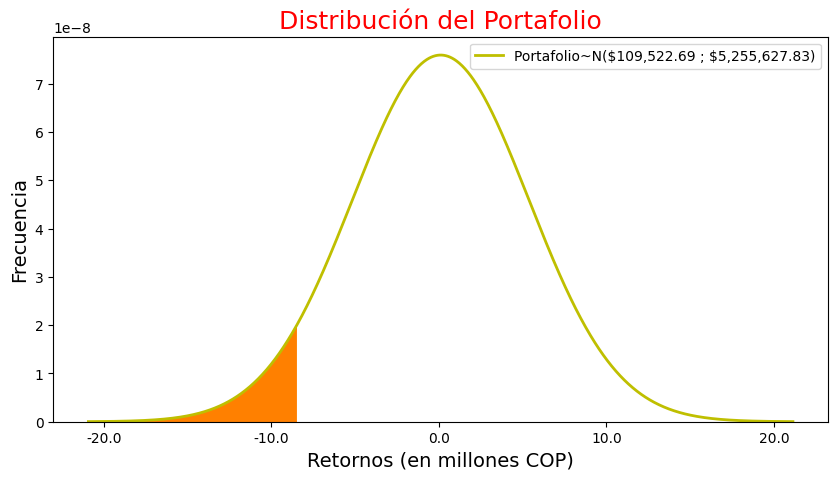

In [18]:
"""
Las siguientes líneas de código generan y muestran la gráfica de la distribución normal  
del portafolio, utilizando los parámetros previamente calculados (media y desviación estándar).  
"""
# Crear una figura y un eje para la gráfica
fig, ax = plt.subplots()

# Graficar la distribución del portafolio con una línea amarilla e incluir una etiqueta formateada
ax.plot(x_axis, y_axis, linewidth=2, color='y', 
        label='Portafolio~N(\\${:,.2f} ; \\${:,.2f})'.format(exp_portafolio, sigma))

# Formatear las etiquetas del eje x para mostrar valores en millones
ax.xaxis.set_major_formatter(lambda x, pos: str(x / 1_000_000))  # Disminuye en un millón el tamaño de los valores en x

# Resaltar el área de la distribución donde los valores del eje x son menores o iguales a VaR
ax.fill_between(x_axis[x_axis <= VaR], y_axis[x_axis <= VaR], color='#FF8000')

# Definir el tamaño de la figura: 10 pulgadas de ancho por 5 de alto
fig.set_size_inches(10, 5)

# Establecer el título del gráfico con color rojo y un tamaño de fuente mayor
plt.title('Distribución del Portafolio', fontsize=18, color="r")

# Etiquetar el eje x y especificar que los valores están en millones de COP
plt.xlabel('Retornos (en millones COP)', fontsize=14)

# Etiquetar el eje y como frecuencia
plt.ylabel('Frecuencia', fontsize=14)

# Asegurar que el eje y comience en cero
plt.ylim(bottom=0)

# Mostrar la leyenda en la esquina superior derecha
plt.legend(loc='upper right')

# Mostrar la gráfica
plt.show()

